In [2]:
import glob
import os as os
import re as re
import pandas as pd
import matplotlib as mpl
import seaborn as sns

%reload_ext autoreload
%autoreload 2
%matplotlib inline
mpl.rc('text', usetex=True)
cmap = sns.color_palette("Paired", 10)

In [3]:
from motors.plot import *
from motors.aesthetics import *
from motors.thresholding import *
prepare_plot()

# Inspect an individual torsion

In [4]:
this = Simulation(data_source = 'adk_md_data')
this.name = 'chi2THR175'
this.simulate()

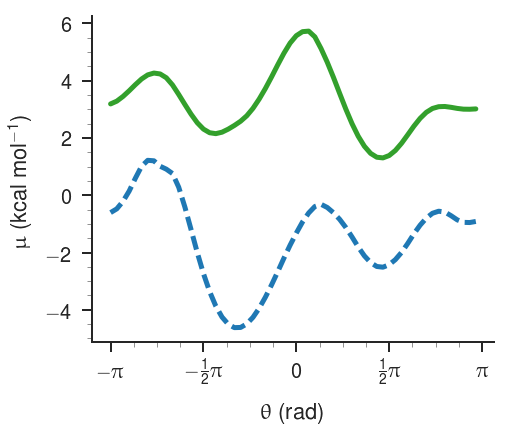

In [5]:
plot_energy(this)

C                         +1.00e+06  second**-1
D                         +3.00e+12  degrees**2 second**-1
k_{cat}                   +3.12e+02  second**-1
[S]                       +2.50e-06  M         
dt                        +1.00e-12  second    
-------------------------
Intrasurface flux         -1.20e+00  cycle second**-1
Peak                      +2.19e-01  cycle second**-1


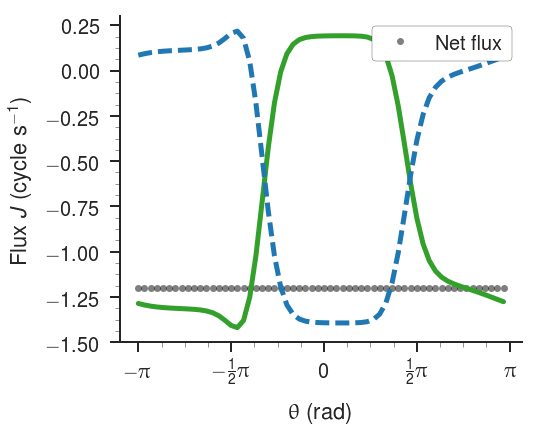

In [6]:
plot_flux(this)

# Generate statistics for a group of torsions

In [5]:
df = pd.read_pickle('adk-concentration-scan.pickle')
df.head()

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
0,-6.0,-0.000533,0.037806,chi1ALA11,0.010940,0.0,0.0,11
1,-6.0,-0.000021,0.011227,chi1ALA127,0.005050,0.0,0.0,127
2,-6.0,-0.000119,0.025289,chi1ALA17,0.009720,0.0,0.0,17
3,-6.0,0.000078,0.016022,chi1ALA176,0.005808,0.0,0.0,176
4,-6.0,0.000033,0.006140,chi1ALA186,0.002077,0.0,0.0,186


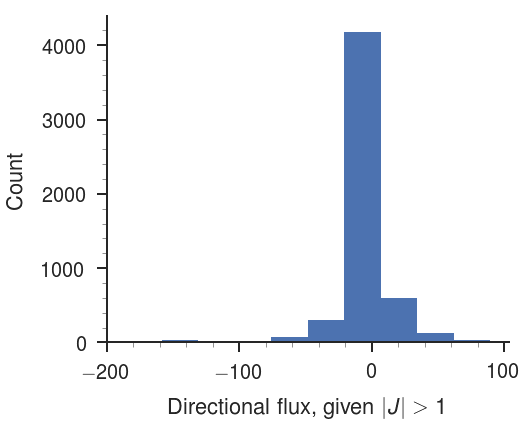

In [6]:
%matplotlib inline
fig = plt.figure(figsize = (6 * 1.2, 6))
ax = df[df['Directional flux'].abs() > 1]['Directional flux'].plot(kind='hist')
ax.set_xlabel('Directional flux, given $|J| > 1$')
ax.set_ylabel('Count')
paper_plot(fig)

In [7]:
tmp = df.round({'Concentration': 2})

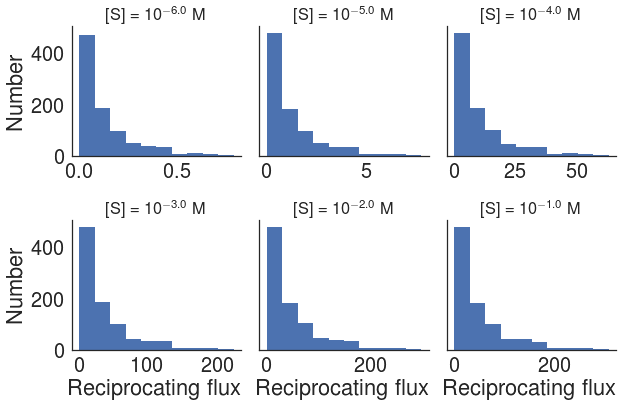

In [8]:
tmp = tmp[(tmp['Concentration'] == -6) |
    (tmp['Concentration'] == -5) |
    (tmp['Concentration'] == -4) |
    (tmp['Concentration'] == -3) |
    (tmp['Concentration'] == -2) |
    (tmp['Concentration'] == -1) ]

g = sns.FacetGrid(tmp, col='Concentration', col_wrap=3, sharex=False)
sns.set(style="ticks", font_scale=1.5)
g = g.map(plt.hist, 'Driven flux')\
          .set_axis_labels(r'Reciprocating flux', r'Number')\
          .set_titles(r'[S] = $10^{{ {col_name} }}$ M')
g.fig.tight_layout(w_pad=1)

In [9]:
tmp = df.round({'Concentration': 2})
tmp = tmp[tmp['Concentration'] == -3.0]
tmp[(tmp['Directional flux'].abs() < 1) & (tmp['Driven flux'] > 1)].head(5)

,Concentration,Directional flux,Driven flux,File,Intersurface flux,Max load,Max power,ResID
27090,-3.0,-0.144208,10.573240,chi1ALA11,3.059189,0.0,0.0,11
27091,-3.0,-0.007508,3.124329,chi1ALA127,1.412363,0.0,0.0,127
27092,-3.0,-0.032975,7.072458,chi1ALA17,2.718294,0.0,0.0,17
27093,-3.0,0.014157,4.480657,chi1ALA176,1.624334,0.0,0.0,176
27094,-3.0,0.013930,1.639636,chi1ALA186,0.580522,0.0,0.0,186


# Advanced usage

In [10]:
this = Simulation(data_source='manual')
this.unbound_population = [abs(np.cos(i)) for i in np.linspace(0, 2*np.pi, 60)] 
this.bound_population = [abs(np.sin(i)) for i in np.linspace(0, 2*np.pi, 60)]

this.offset_factor = 0
this.C_intersurface = 10**6
this.catalytic_rate = 100
this.cSubstrate = 10**6
this.simulate()

Using manual parameters, specify C, offset, and catalytic rate.


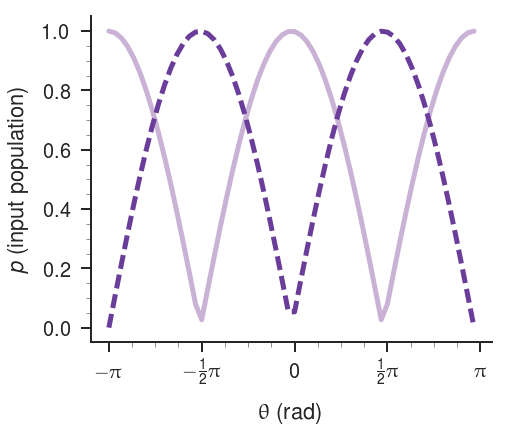

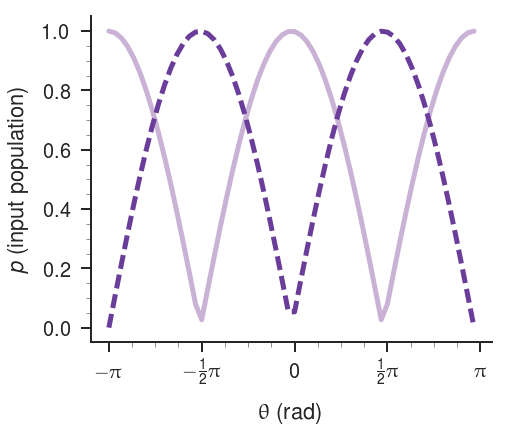

In [11]:
prepare_plot() # Reset format from the FacetGrid
plot_input(this)

Using manual parameters, specify C, offset, and catalytic rate.


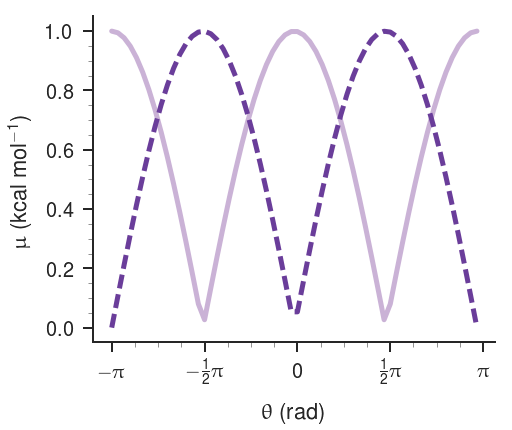

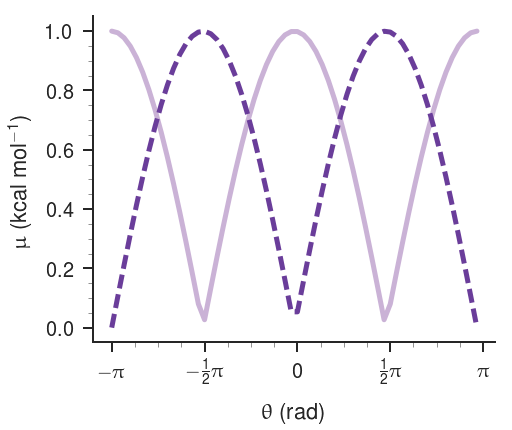

In [12]:
this = Simulation(data_source='manual')
this.unbound = [abs(np.cos(i)) for i in np.linspace(0, 2*np.pi, 60)] 
this.bound = [abs(np.sin(i)) for i in np.linspace(0, 2*np.pi, 60)]

this.offset_factor = 0
this.C_intersurface = 10**6
this.catalytic_rate = 100
this.cSubstrate = 10**6
this.simulate(user_energies=True)

plot_energy(this)